<div class="output_png output_subarea output_execute_result">
<center>
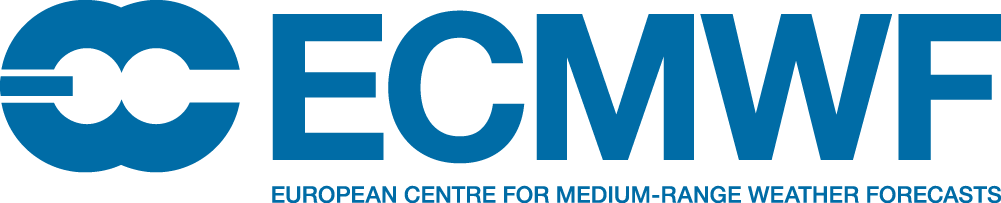</center>
</div>

# 	Probabilities: 24hr total precipitation

This notebook will provide you guidance how to explore and plot ECMWF open dataset to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://apps.ecmwf.int/webapps/opencharts/products/medium-tp-probability


<div class="output_png output_subarea output_execute_result">
<center>
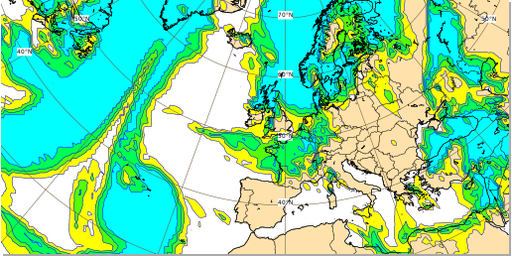</center>
</div>

The full list of available Open data products can be found [here](https://www.ecmwf.int/en/forecasts/datasets/open-data), and more information can be found in the [User documentation](https://confluence.ecmwf.int/display/UDOC/ECMWF+Open+Data+-+Real+Time).  

Access to ECMWF Open data is governed by the Creative Commons CC-BY-4.0 licence and associated [Terms of Use](https://apps.ecmwf.int/datasets/licences/general/).  

<sub> In applying this licence, ECMWF does not waive the privileges and immunities granted to it by virtue of its status as an intergovernmental organisation nor does it submit to any jurisdiction </sub>

To find out how to obtain the access to the full forecast dataset at higher resolution please visit our [Access page](https://www.ecmwf.int/en/forecasts/accessing-forecasts).

## Retrieve Data
This product takes in input one of 6 parameters :

* [Total precipitation of at least 1 mm](https://apps.ecmwf.int/codes/grib/param-db/?id=131060)
* [Total precipitation of at least 5 mm](https://apps.ecmwf.int/codes/grib/param-db/?id=131061)
* [Total precipitation of at least 10 mm](https://apps.ecmwf.int/codes/grib/param-db/?id=131062)
* [Total precipitation of at least 20 mm](https://apps.ecmwf.int/codes/grib/param-db/?id=131063)
* [Total precipitation of at least 25 mm](https://apps.ecmwf.int/codes/grib/param-db/?id=131098)
* [Total precipitation of at least 50 mm](https://apps.ecmwf.int/codes/grib/param-db/?id=131099)
* [Total precipitation of at least 100 mm](https://apps.ecmwf.int/codes/grib/param-db/?id=131085)

In this example, we will use: 
- **ecmwf.opendata** Client to download the data
- **ecmwf.data** library to read and process the data 
- **ecmwf.geomaps** to plot the result

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> If you are running the notebook on MyBinder or already have the libraries installed, go directly to importing the libraries.
</div>
<div class="alert alert-block alert-info">
<b>Note:</b> If you don't have these libraries installed, click on three dots below, uncomment the code and run the next cell.
</div>

In [1]:
#import sys
#!{sys.executable} -m pip install ecmwf-data ecmwf-opendata git+https://github.com/ecmwf/ecmwf-geomaps.git

In [2]:
import ecmwf.data as ecdata
from ecmwf.geomaps import GeoMap
from ecmwf.opendata import Client

In [3]:
client = Client("ecmwf", beta=True)

In [4]:
parameters = ['tpg1','tpg5','tpg10','tpg20','tpg25','tpg50','tpg100']
filename = 'medium-tp-probability.grib'
filename

'medium-tp-probability.grib'

<div class="alert alert-block alert-success">
Note that this parameter has slightly different step than most of other parameters.  
Since this parameter is probability for the total precipitation bigger than a threshold in a 24 hours period, the step is interval between the beginning and the end of the period.
</div>

In [5]:
client.retrieve(
    date=-2,
    time=0,
    step="120-144",
    stream="enfo",
    type="ep",
    levtype="sfc",
    param=parameters,
    target=filename
)

{'date': '-2', 'time': '0', 'step': '240', 'stream': 'enfo', 'type': 'ep', 'resol': '0p4-beta', '_url': 'https://ai4edataeuwest.blob.core.windows.net/ecmwf', 'extension': 'grib2'}
{'levtype': ['sfc'], 'param': ['tpg1', 'tpg5', 'tpg10', 'tpg20', 'tpg25', 'tpg50', 'tpg100'], 'step': ['120-144'], 'type': ['ep']}


## Reading and processing the data
Now we can use **ecmwf.data** to read the file.

In [6]:
data = ecdata.read(filename)

The **describe()** function will give us the overview of the dataset.  

In [7]:
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
tpg1,surface,0,20220116,0,120-144,None,131060,od,enfo,ep,0001
tpg10,surface,0,20220116,0,120-144,None,131062,od,enfo,ep,0001
tpg100,surface,0,20220116,0,120-144,None,131085,od,enfo,ep,0001
tpg20,surface,0,20220116,0,120-144,None,131063,od,enfo,ep,0001
tpg25,surface,0,20220116,0,120-144,None,131098,od,enfo,ep,0001
tpg5,surface,0,20220116,0,120-144,None,131061,od,enfo,ep,0001
tpg50,surface,0,20220116,0,120-144,None,131099,od,enfo,ep,0001


And specifying the parameter shortName in the describe function, we can get more detailed information about the data.

In [8]:
data.describe('tpg20')

shortName,tpg20
name,Total precipitation of at least 20 mm
paramId,131063
units,%
typeOfLevel,surface
level,0
date,20220116
time,0
step,120-144
number,None
class,od


We can use **ls()** function to list all the fields in the file we downloaded.

In [9]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,tpg20,surface,0,20220116,0,120-144,ep,None,regular_ll
1,ecmf,tpg5,surface,0,20220116,0,120-144,ep,None,regular_ll
2,ecmf,tpg10,surface,0,20220116,0,120-144,ep,None,regular_ll
3,ecmf,tpg1,surface,0,20220116,0,120-144,ep,None,regular_ll
4,ecmf,tpg25,surface,0,20220116,0,120-144,ep,None,regular_ll
5,ecmf,tpg50,surface,0,20220116,0,120-144,ep,None,regular_ll
6,ecmf,tpg100,surface,0,20220116,0,120-144,ep,None,regular_ll


The grib file contains all the parameters, and we will use the **select()** function to filter one of them.

In [10]:
data_tpg1 = data.select(shortName= "tpg1")
data_tpg5 = data.select(shortName= "tpg5")
data_tpg10 = data.select(shortName= "tpg10")
data_tpg20 = data.select(shortName= "tpg20")
data_tpg20.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
tpg20,surface,0,20220116,0,120-144,None,131063,od,enfo,ep,0001


## Plotting the data
And finally, we can plot the data on the map. 

Magics-warning: description is not a known keyword


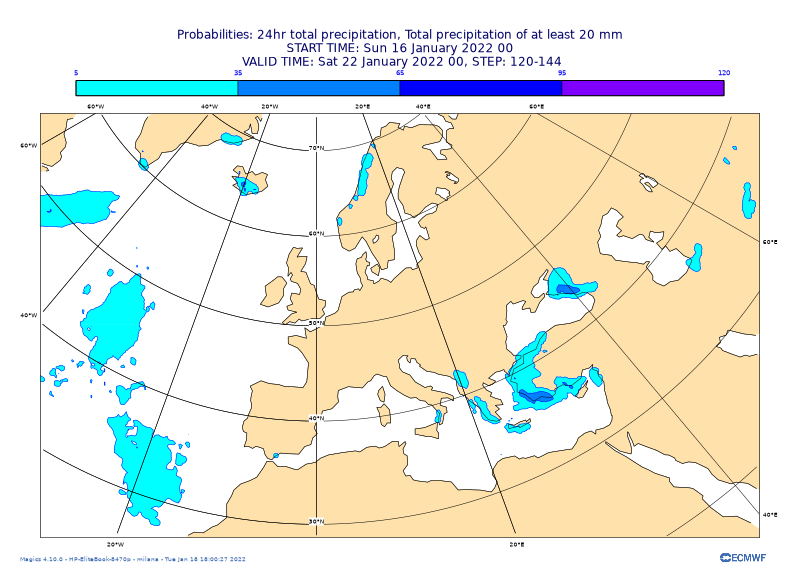

In [11]:
fig = GeoMap(area_name='europe', preset='background-foreground')

fig.contour_lines(data_tpg20, preset="sh_blup_f0t100lst")

fig.title(["Probabilities: 24hr total precipitation, <grib_info key='name'/>",
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H'/> ",
           " VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' />, STEP: <grib_info key='step'/>"])
fig.legend()

fig.show()               

